# Dividir data sets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("../python-ml-course/datasets/ads/Advertising.csv")

In [7]:
a = np.random.randn(len(data))

(array([ 9., 11., 25., 25., 35., 35., 32., 16.,  9.,  3.]),
 array([-2.41829849, -1.93015861, -1.44201874, -0.95387886, -0.46573898,
         0.02240089,  0.51054077,  0.99868065,  1.48682053,  1.9749604 ,
         2.46310028]),
 <a list of 10 Patch objects>)

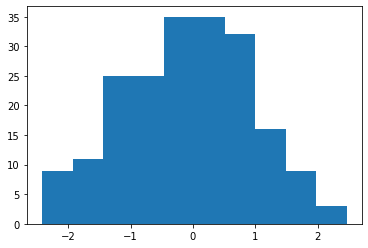

In [8]:
plt.hist(a)

In [9]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [15]:
len(testing),  len(training)

(43, 157)

In [18]:
import statsmodels.formula.api as smf

In [26]:
lm = smf.ols(formula="Sales~TV+Radio", data = training ).fit()

In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     748.7
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           4.62e-80
Time:                        17:07:55   Log-Likelihood:                -292.54
No. Observations:                 157   AIC:                             591.1
Df Residuals:                     154   BIC:                             600.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9642      0.317      9.360      0.000       2.339       3.590
TV             0.0454      0.001     30.473      0.000       0.042       0.048
Radio          0.1908      0.009     22.338      0.000       0.174       0.208
==============================================================================
Omnibus:                       20.229   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.683
Skew:                          -0.900   Prob(JB):                     7.20e-06
Kurtosis:                       3.616   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9642 +0.0454 *TV + 0.1908 * RADIO

##Validacion del modelo

In [28]:
sales_pred= lm.predict(testing)
sales_pred

10      7.069157
12     10.741424
14     18.499920
20     18.156305
22      6.596908
25     15.557001
28     19.420739
31     11.405465
40     16.404674
41     17.366090
46      8.921992
47     21.764821
56      8.657268
58     21.990489
60      5.772520
61     22.964493
62     16.776336
65      7.868562
67     12.049580
73      9.921324
76      4.516849
77     13.868276
80     11.524455
89     17.065719
92     19.231298
94     10.507207
101    23.335372
102    17.601117
108     3.634692
119     6.897218
122    13.582621
123    15.150201
130    10.552303
131    15.546837
136    11.567261
147    23.345642
154    15.508909
156    15.523988
159    12.449039
161    13.682742
186     9.692508
190    12.598474
199    15.133104
dtype: float64

In [30]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

176.14911163389274

In [31]:
RSE = np.sqrt(SSD/(len(testing)-2-1))

In [32]:
RSE

2.098506085492086

In [33]:
sales_mean = np.mean(testing["Sales"])
erro = RSE/sales_mean
erro

0.1554984691989656

In [ ]:
len